In [1]:
# import numpy as np
import sympy
from sympy import *

init_printing()

In [2]:
x = Matrix(symbols('x0:6'))
u = Matrix(symbols('x0:2'))
t = symbols('t')

m = 1
l = -1
g = 9.8
I = 1

In [3]:
def f(x, u, t):
#     _, _, theta, xdot, ydot, thetadot = x
#     T, v = u
    
    xddot     = 1/m * (-sin(x[2] + u[1]) * u[0])
    yddot     = 1/m * (cos(x[2] + u[1]) * u[0]) - g
    thetaddot = 1/I * (sin(u[1]) * u[0] * l)

    return [x[3], x[4], x[5], xddot, yddot, thetaddot]

In [4]:
dx = Matrix(f(x,u,0))

In [5]:
sym_dfdx = dx.jacobian(x)
sym_dfdu = dx.jacobian(u)

In [19]:
dfdx = lambdify((x, u, t), sym_dfdx, modules='sympy')

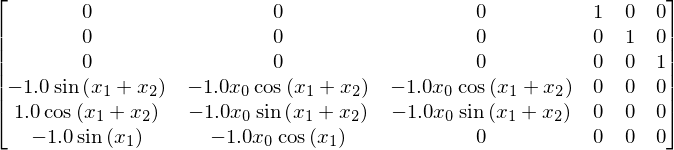

In [20]:
dfdx(x,u,t)

In [23]:
from tictoc import tic,toc
tic()
dfdx(np.zeros(6),np.zeros(2),0)
toc()

0.0010890960693359375


In [26]:
diff(t,x)

In [38]:
# test = Matrix([x[0] + x[1], sin(u[0]) + cos(u[1])])
test = x[0]**2 + x[1]**2
test_lambda = lambdify(x, test)

In [43]:
test_lambda(*np.ones(6))


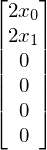

In [44]:
test.diff(x)

In [48]:
sympy.Heaviside(-1)